Loading required package: clusterSim

Loading required package: cluster

Loading required package: MASS



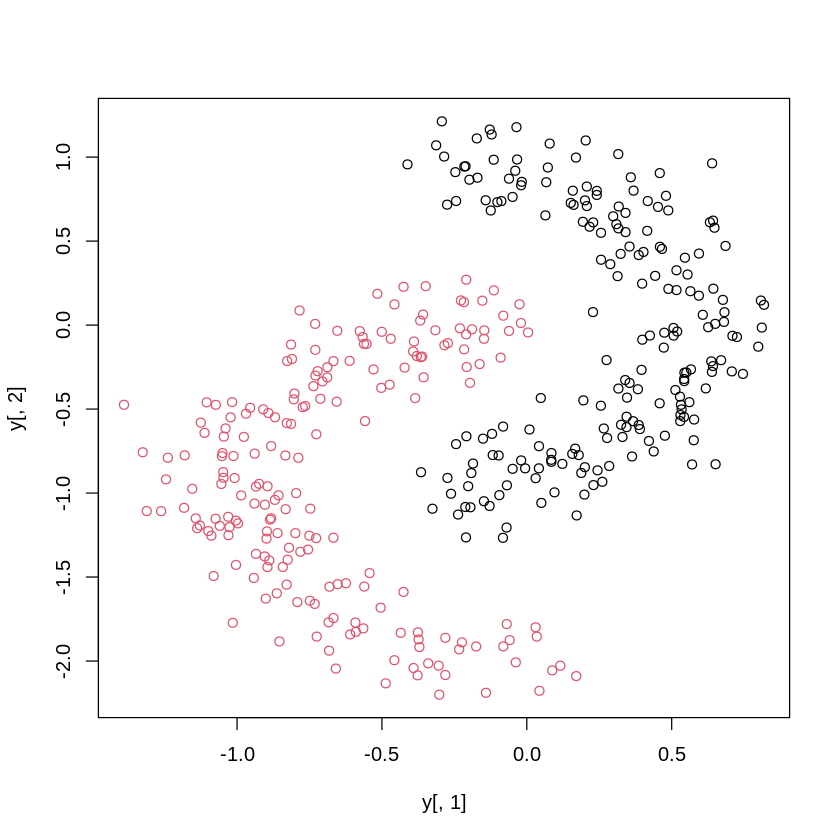

In [1]:
require("clusterSim")

n= 400
p<- 2
data<- shapes.two.moon(numObjects = n/2)

y<- data$data
true_membership<- data$clusters

y<- y+ rnorm(n*2, sd=0.1)

plot(y[,1],y[,2],col=true_membership)

In [2]:
source("forest_class.R")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: GIGrvg

Loading required package: gtools


Attaching package: ‘gtools’


The following object is masked from ‘package:igraph’:

    permute


Loading required package: RcppML

Loading required package: clue



In [3]:
forest_objs<- list()

for(s in 1:5){
    forest_objs[[s]]<- Forest$new()
    forest_objs[[s]]$init(y)
}


In [4]:
init_sigma_tilde<- list()
init_gamma_r<- list()

for(s in 1:5){
init_sigma_tilde[[s]]<- 1/rgamma(forest_objs[[s]]$n,0.5,0.5)
init_gamma_r[[s]] <- 1/rgamma(1,0.5,0.5) 
    }

In [5]:
for(s in 1:5){
    forest_objs[[s]]$gamma_r<- init_gamma_r[[s]]
    forest_objs[[s]]$sigma_tilde<-  init_sigma_tilde[[s]]
    forest_objs[[s]]$updateLogS(forest_objs[[s]]$sigma_tilde,forest_objs[[s]]$mu_r,forest_objs[[s]]$gamma_r)
    forest_objs[[s]]$drawT(forest_objs[[s]]$logS)
    }

In [6]:
coords=y

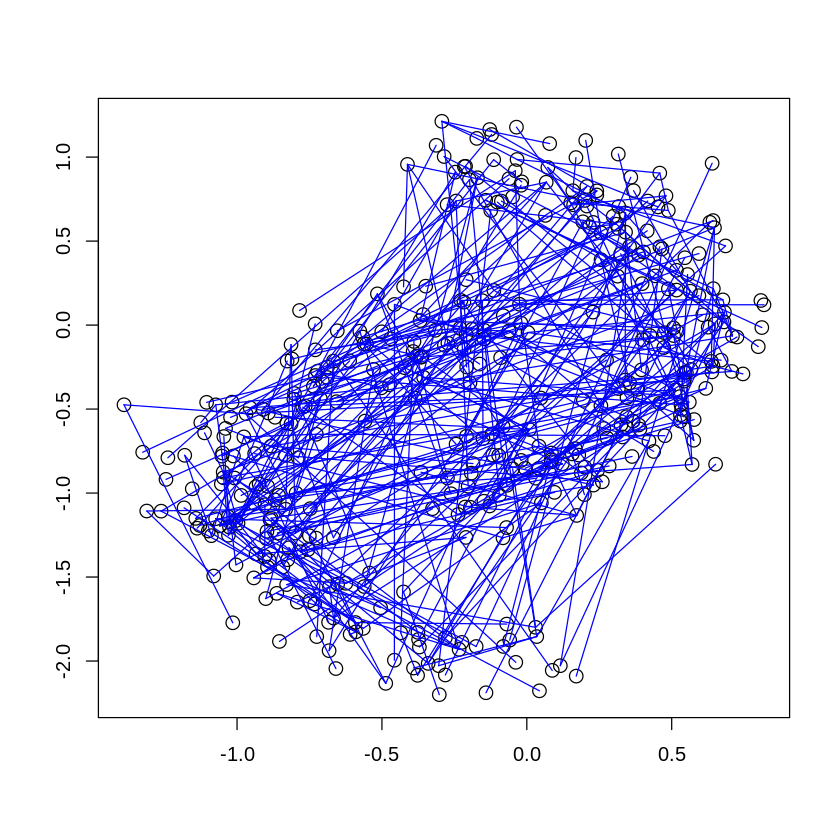

In [7]:
# png("mcmc_diag_random_init1.png",800,800,res = 150)
par(cex.axis=1.0)

iter = 1

s=1

forest = forest_objs[[s]]
plot(coords[,1],coords[,2],cex=1.5, pch=1,xlab="",ylab="")
for(i in 2:n){
  for(j in 1:i){
    if(forest$A_T[i,j]==1){
            lines(coords[c(i,j),1],coords[c(i,j),2], col='blue')
        }
    }
}

# dev.off()

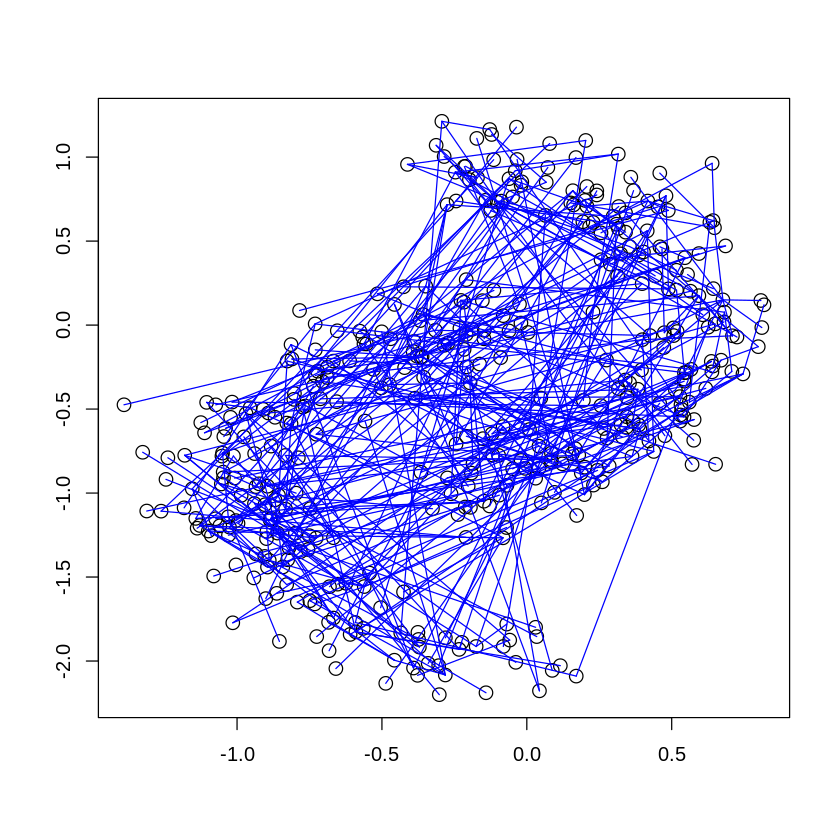

In [8]:
# png("mcmc_diag_random_init2.png",800,800,res = 150)
par(cex.axis=1.0)

iter = 1

s=2

forest = forest_objs[[s]]
plot(coords[,1],coords[,2],cex=1.5, pch=1,xlab="",ylab="")
for(i in 2:n){
  for(j in 1:i){
    if(forest$A_T[i,j]==1){
            lines(coords[c(i,j),1],coords[c(i,j),2], col='blue')
        }
    }
}

# dev.off()

In [9]:
for(s in 1:5){
    forest_objs[[s]]$MCMC_run_single_graph(n_iter= 1000, burnin=0)
    }

  |==================================================| 100%

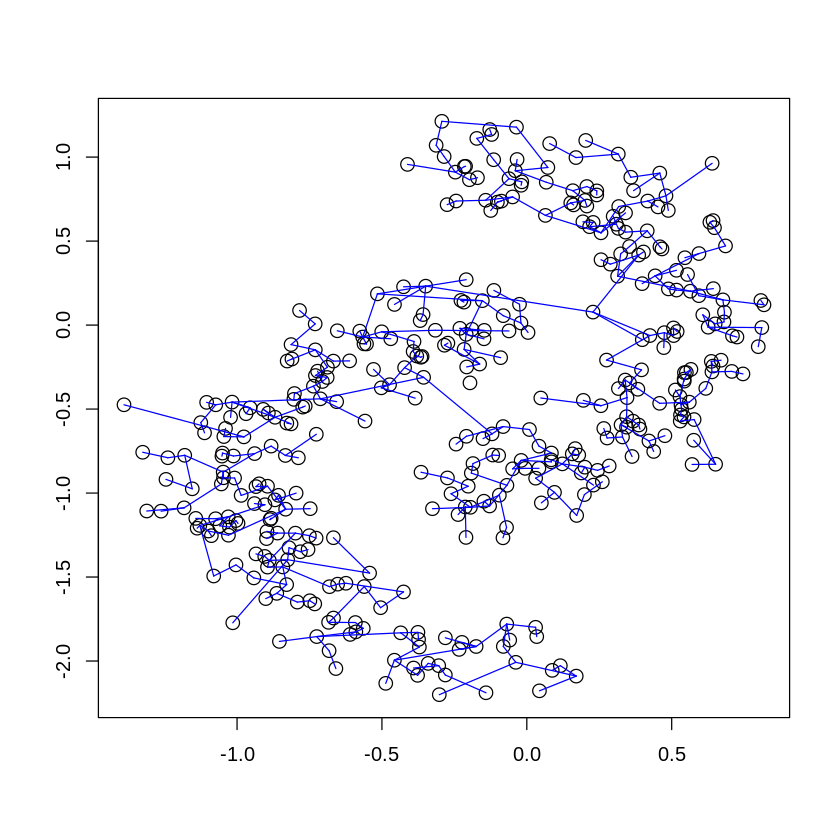

In [21]:
# png("mcmc_diag_random_conv1.png",800,800,res = 150)
par(cex.axis=1.0)

iter = 100

s=1

forest = forest_objs[[s]]
A<- forest$trace_A_T[[iter]]

plot(coords[,1],coords[,2],cex=1.5, pch=1,xlab="",ylab="",col=extractC(A))
for(i in 2:n){
  for(j in 1:i){
    if(A[i,j]==1){
            lines(coords[c(i,j),1],coords[c(i,j),2], col='blue')
        }
    }
}

# dev.off()

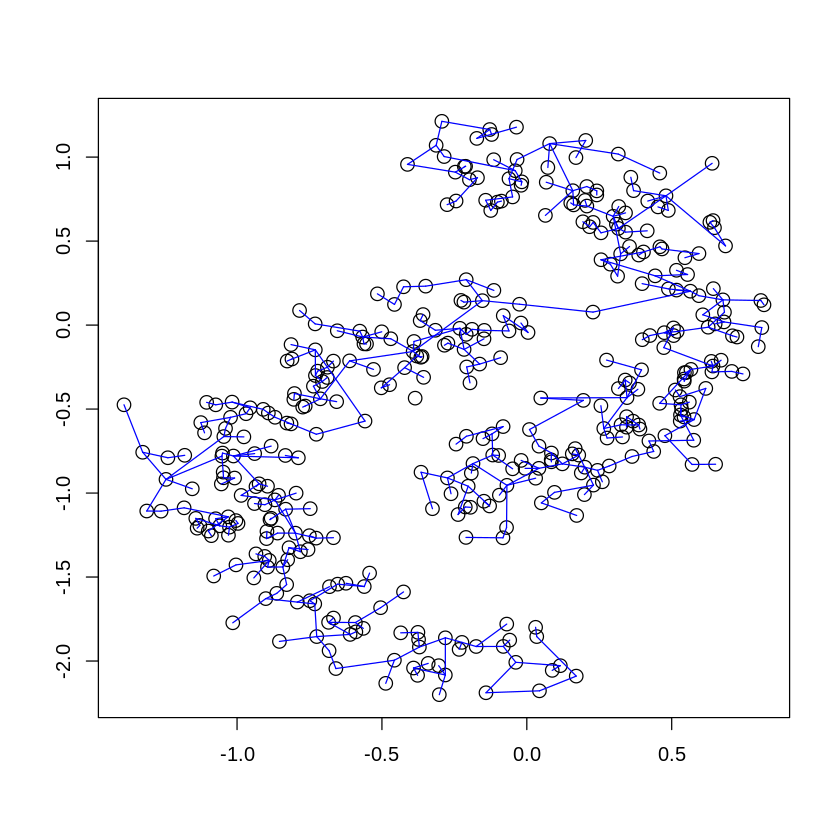

In [22]:
# png("mcmc_diag_random_conv2.png",800,800,res = 150)
par(cex.axis=1.0)

iter = 200

s=1


forest = forest_objs[[s]]
A<- forest$trace_A_T[[iter]]

plot(coords[,1],coords[,2],cex=1.5, pch=1,xlab="",ylab="",col=extractC(A))
for(i in 2:n){
  for(j in 1:i){
    if(A[i,j]==1){
            lines(coords[c(i,j),1],coords[c(i,j),2], col='blue')
        }
    }
}

# dev.off()

In [12]:
require("coda")

Loading required package: coda



In [23]:
trace_trace_sigma_tilde<- list()

for(s in 1:5){
trace_trace_sigma_tilde[[s]]<- do.call("rbind",forest_objs[[s]]$trace_sigma_tilde)
    }

In [24]:
trace_gamma_list<- list()

for(s in 1:5){
    trace_gamma_list[[s]]<- do.call("c",forest_objs[[s]]$trace_gamma_r)
}

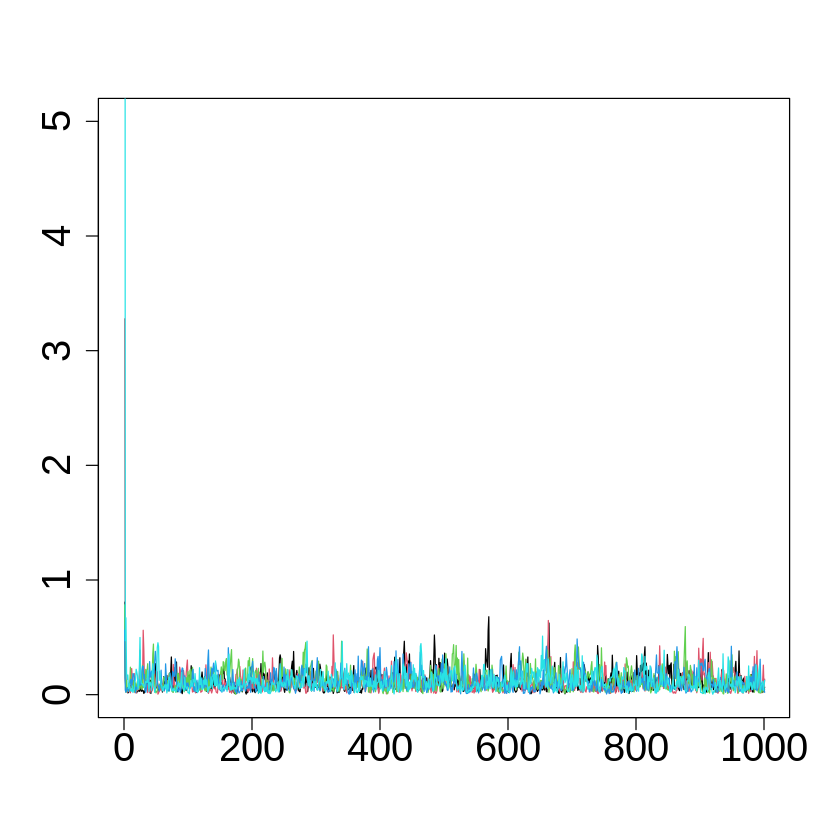

In [26]:
j=1

# png("mcmc_diag_multiple_chains.png",800,800,res = 150)
par(cex.axis=2.0)

plot(c(0,1000),c(0,5),type='n',xlab="",ylab="")
for(s in 1:5){
    line1<-  c(init_sigma_tilde[[s]][j],trace_trace_sigma_tilde[[s]][,j])
    lines((line1),col=s)
    }

# dev.off()

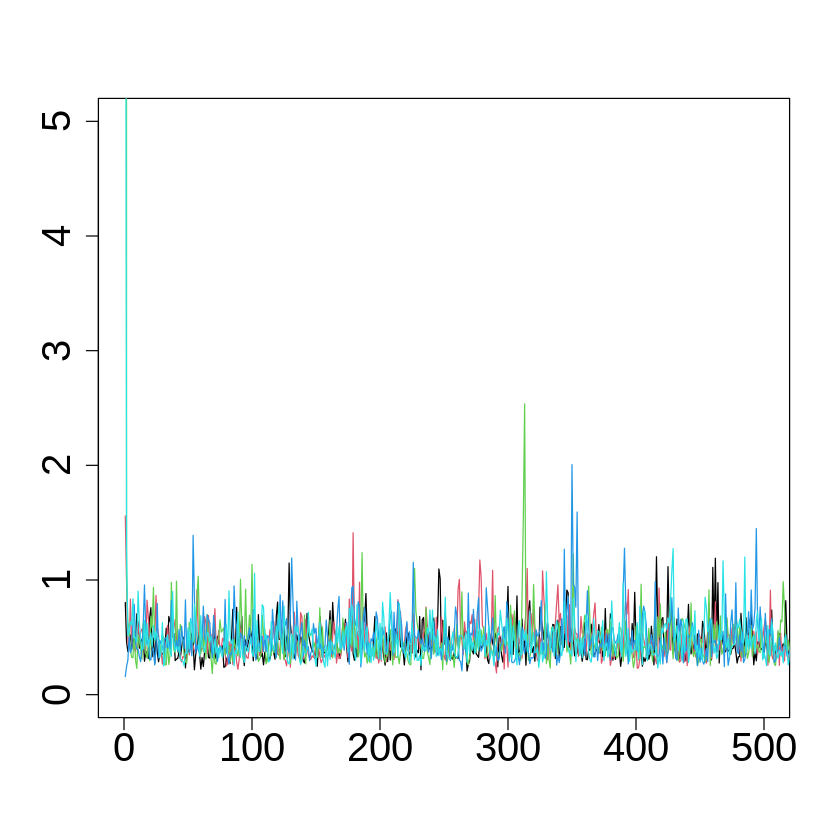

In [27]:
j=1

# png("mcmc_diag_multiple_chains2.png",800,800,res = 150)
par(cex.axis=2.0)

plot(c(0,500),c(0,5),type='n',xlab="",ylab="")
for(s in 1:5){
    line1<- c(init_gamma_r[[s]], trace_gamma_list[[s]])
    lines((line1),col=s)
    }

# dev.off()

In [28]:
mcmc_list<- as.mcmc.list(lapply(trace_trace_sigma_tilde, function(x) as.mcmc(x)))
gr_stats <- gelman.diag(mcmc_list)

In [29]:
mcmc_list<- as.mcmc.list(lapply(trace_gamma_list, function(x) as.mcmc(x)))
gr_stats2 <- gelman.diag(mcmc_list)

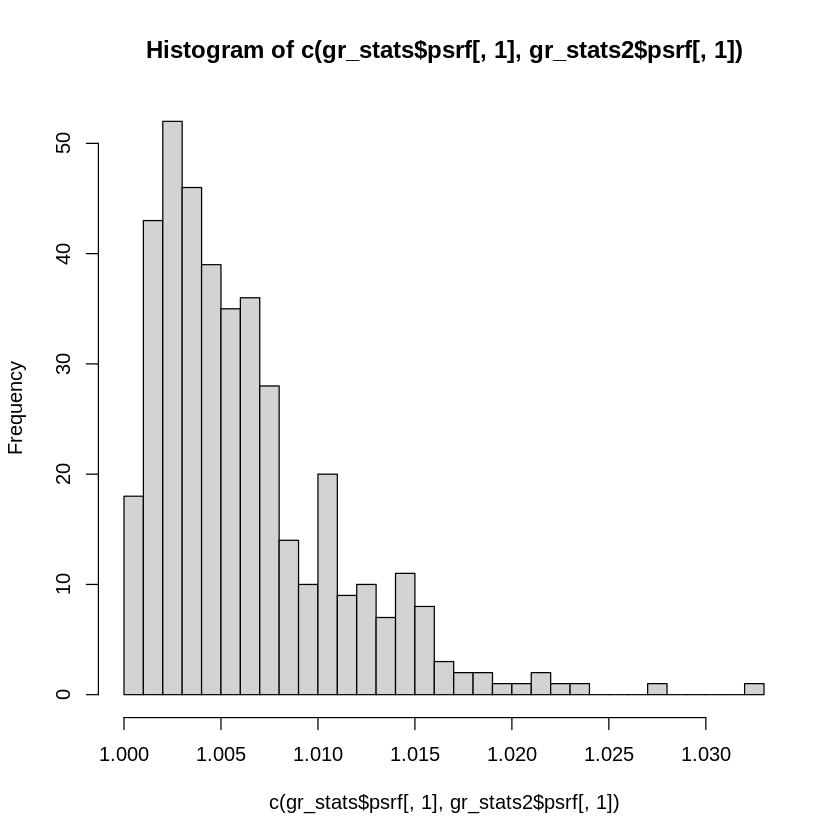

In [31]:
hist(c(gr_stats$psrf[,1],gr_stats2$psrf[,1]),breaks=30)